In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

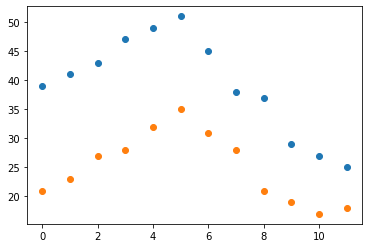

In [17]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

months = np.arange(12)

plt.scatter(x=months,y=Max)
plt.scatter(x=months,y=Min)

#### 1. fitting it to the periodic function

In [21]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,Min, [-40, 20, 0])

#### 2. Plot

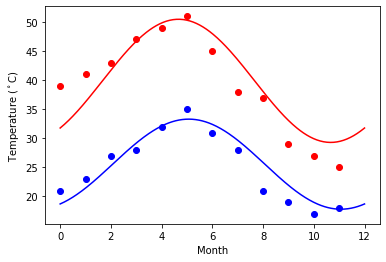

In [24]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

### Question 2:

Matplotlib:

This assignment is for visualization using matplotlib:

data to use:

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:

1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [79]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

In [80]:
titanic = pd.read_csv(url,skip_blank_lines=True)

In [81]:
titanic.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

#### 1. Create a pie chart presenting the male/female proportion

In [82]:
titanic['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff8efca1470>,
 [Text(-0.48083677220945115, 0.9893411941747885, '843'),
  Text(0.48083667958064136, -0.9893412391939718, '466')])

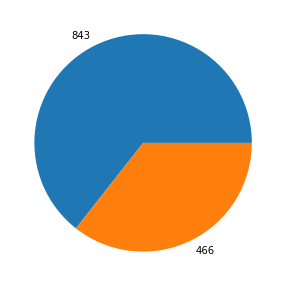

In [83]:
fig = plt.figure(figsize=(5,5))
plt.pie(x=titanic['sex'].value_counts(), data=titanic,labels =titanic['sex'].value_counts())

#### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0       female
1         male
2       female
3         male
4       female
         ...  
1304    female
1305    female
1306      male
1307      male
1308      male
Name: sex, Length: 1309, dtype: object

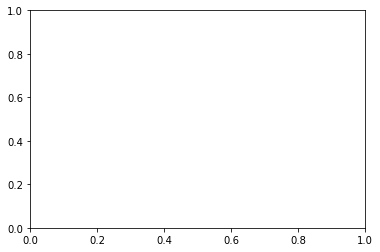

In [84]:
cols = {'male': 'red', 'female': 'blue'}
plt.scatter(x=titanic.fare,y=titanic.age,c=titanic['sex'].iloc[:-1])

ValueError: 'c' argument has 1309 elements, which is inconsistent with 'x' and 'y' with size 1310.

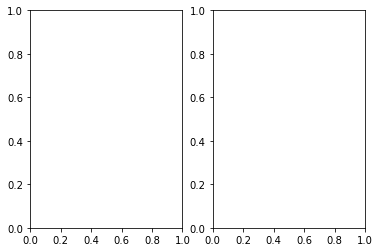

In [87]:
f, (ax1, ax2) = plt.subplots(1, 2)

colors = {'male':'blue', 'female':'orange'}
ax2.scatter(titanic.fare,titanic.age,c=titanic['sex'].iloc[:-1].apply(lambda x: 
    colors[x]))
ax2.set_xlabel('Fare')
ax2.set_ylabel('Age')
ax2.set_title('Fare paid and the Age')